In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [258]:
df = pd.read_csv('churn.csv', skipinitialspace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [259]:
#check how many categories for each columns
for x in df.columns:
    print(x, len(df[x].unique()))

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [260]:
# selecting feature
# based on Information Theory, i exclude 
exclude = ['RowNumber', 'CustomerId', 'Surname']
for column in df.columns:
    for exc in exclude:
        if exc == column:
            print(exc, '=', column, '-> deleting...')
            df.drop([column], axis=1, inplace=True)
        else:
            continue
df

RowNumber = RowNumber -> deleting...
CustomerId = CustomerId -> deleting...
Surname = Surname -> deleting...


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [261]:
# since sklearn can only process cateoprical integer
# let's get dummies
#'Gender', 'Geography'
enc = LabelEncoder()
enc.fit(df.Gender)
df.Gender = enc.transform(df.Gender)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [262]:
enc.fit(df.Geography)
df.Geography = enc.transform(df.Geography)
print(enc.classes_)
df

['France' 'Germany' 'Spain']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [263]:
df.rename(columns={'Gender_Female':'Female', 'Gender_Male':'Male',
                   'Geography_France':'France', 'Geography_Germany':'Germany',
                  'Geography_Spain':'Spain'}, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.3 KB


In [265]:
#DecTree can handle missing value & robust to outlier

In [266]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Exited')
y = df['Exited']

print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [267]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

In [268]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 10)
(3300, 10)
(6700,)
(3300,)


In [269]:
model = DecisionTreeClassifier() # by default, its gini impurity
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [270]:
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.7818181818181819)

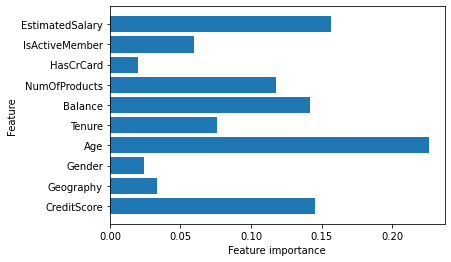

In [271]:
#features importance
#1 = perfectly predicts the target, 0 = not used at all
def plot_feature_importances(inp):
    n_features = x.shape[1]
    plt.barh(range(n_features), inp.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(model)

In [272]:
#model improvement(1)
# cross val splitting
from sklearn.model_selection import cross_val_score


In [273]:
cv = cross_val_score(model, x, y, cv=5)
cv.mean()

0.7859

In [274]:
#model improvement(2)
#tuning hyperparameter with cross val

from sklearn.model_selection import GridSearchCV

params = {'max_depth':[x for x in range(2, 11)], 'min_samples_leaf':[c for c in range(1, 11)]}
params2 = {'max_depth':[x for x in range(1, 11)]}

grid = GridSearchCV(model, param_grid=params2, cv = 5)
print("parameters max depth:", (params2['max_depth']))

parameters max depth: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [275]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=0)
grid.fit(x_train, y_train)
y_prediction = grid.predict(x_test)#for confusion metric

In [276]:
print("best parameters", grid.best_estimator_)
print("grid search cv score:", grid.score(x_test, y_test))

best parameters DecisionTreeClassifier(max_depth=6)
grid search cv score: 0.8448484848484848


In [277]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_prediction)
cf

array([[2557,   71],
       [ 441,  231]], dtype=int64)

In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2628
           1       0.76      0.34      0.47       672

    accuracy                           0.84      3300
   macro avg       0.81      0.66      0.69      3300
weighted avg       0.83      0.84      0.82      3300



In [279]:
tableau_params = list(x.columns)
print(tableau_params)
print(len(tableau_params))

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
10


In [305]:
def churn_predictor(_arg1, _arg2, _arg3, _arg4, _arg5, _arg6, _arg7, 
                    _arg8, _arg9, _arg10):
    
    row = {'CreditScore':_arg1, 'Geography':_arg2, 'Gender':_arg3, 'Age':_arg4, 'Tenure':_arg5, 
           'Balance':_arg6, 'NumOfProducts':_arg7, 'HasCrCard':_arg8, 'IsActiveMember':_arg9, 
           'EstimatedSalary':_arg10}
    
    new_df = pd.DataFrame(data=row, index=[0])
        
    enc1 = LabelEncoder()
    enc1.fit(new_df.Gender)
    new_df.Gender = enc1.transform(new_df.Gender)
    
    
    enc2 = LabelEncoder()
    enc2.fit(new_df.Geography)
    new_df.Geography = enc2.transform(new_df.Geography)
    
    enc3 = LabelEncoder()
    enc3.fit(new_df.HasCrCard)
    new_df.HasCrCard = enc3.transform(new_df.HasCrCard)
    
    enc3 = LabelEncoder()
    enc3.fit(new_df.IsActiveMember)
    new_df.IsActiveMember = enc3.transform(new_df.IsActiveMember)
    
    #predprob_churn = grid.predict_proba(new_df)
    predprob_churn2 = grid.predict(new_df)
    
    #return [prob[1] for prob in predprob_churn]
    #pred vs predprob?
    
    if predprob_churn2.tolist() == [1]:
        return 'Yes'
    else: return 'No'
    
    #return predprob_churn2.tolist()

In [306]:
churn_predictor(370,'Spain','Female',36,1,0,1,'No','No',4000)

'Yes'

In [307]:
from tabpy.tabpy_tools.client import Client
client = Client('http://localhost:9004/')

In [308]:
client.deploy(name='churn_predictor', obj=churn_predictor, description=
              "Predict new user either they exit or don't exit", override=True)